In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import scipy.io
 
train_mat = scipy.io.loadmat('data/mnist_train.mat')
train_data = train_mat['images']
train_labels = train_mat['labels']
 
test_mat = scipy.io.loadmat('data/mnist_test.mat')
test_data = test_mat['t10k_images']
test_labels = test_mat['t10k_labels']

In [4]:
K = train_data.shape[0]
N = train_data.shape[1]
print train_data.shape
# each column in the matrix is the set of values for an instance

(784, 60000)


In [5]:
avgs = []
for i in range(10):
    vals = [j for j in range(len(train_labels)) if train_labels[j][0] == i]
    vals_mat = np.array([train_data[:,j] for j in vals])
    vals_avg = np.mean(vals_mat, axis=0)
    avgs += [vals_avg]
    
avgs = np.array(avgs)
print avgs.shape

(10, 784)


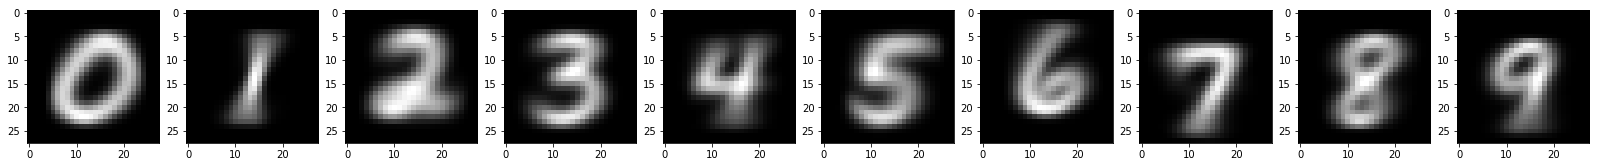

In [6]:
fig, ax_lst = plt.subplots(1, 10, figsize=(28, 28))

for i, avg in enumerate(avgs):
    ax_lst[i].imshow( avg.reshape(28,28).T, interpolation='nearest', cmap="gray")
    
plt.show()

In [7]:
prob = []
for i in range(len(avgs)):
    diff = avgs[i:i+1].T - test_data
    prob += [np.exp( -0.5 * np.sum( diff * diff, axis=0 ) )]
    
prob = np.array(prob)
print prob.shape
predictions = np.argmax(prob, axis=0)
print predictions.shape

(10, 10000)
(10000,)


In [8]:
count = 0
for i, pred in enumerate(predictions):
    if pred != test_labels[i][0]:
        count += 1

error = float(count) / float(test_labels.shape[0])
print str(error * 100) + '% error rate'

17.97% error rate


[[ 878    0   19    4    1   11   18    2   14   15]
 [   0 1092   71   24   22   63   27   59   39   22]
 [   7   10  781   25    2    2   22   22   11    7]
 [   2    3   33  814    0  118    0    1   83   10]
 [   2    0   31    1  811   21   31   20   12   83]
 [  58    7    3   49    3  612   32    2   36   12]
 [  25    3   23    8   16   27  827    0   13    1]
 [   1    0   18   15    1   10    0  856   10   27]
 [   7   20   50   58   10   13    1   13  718   18]
 [   0    0    3   12  116   15    0   53   38  814]]


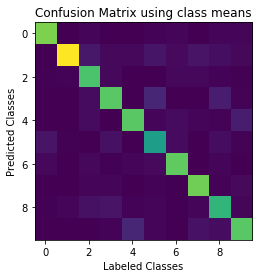

In [10]:
confusion = []
for k in range(10):
    vals = [test_labels[i,0] for i, p in enumerate(predictions) if p == k]
    confusion += [np.bincount(vals, minlength=10)]
    
confusion = np.array(confusion)
# print confusion.shape
print confusion

plt.title('Confusion Matrix using class means')
plt.xlabel('Labeled Classes')
plt.ylabel('Predicted Classes')
plt.imshow( confusion )
plt.show()

In [9]:
classes = []
for i in range(10):
    classes += [np.array([train_data[:,j] for j in range(len(train_labels)) if train_labels[j][0] == i]).T]

In [10]:
probs = []
tests = test_data[:,:1000]
for k in range(tests.shape[1]):
    prob = []
    for arr in classes:
        diff = tests[:,k:k+1] - arr
        prob += [np.mean( np.exp( -0.5 * np.sum( diff * diff, axis=0 ) ) )]
    probs += [np.array(prob)]
        
probs = np.array(probs)
print probs.shape

(1000, 10)


In [11]:
preds = np.argmax(probs, axis=1)
print preds.shape

(1000,)


In [13]:
count = 0
for i, pred in enumerate(preds):
    if pred != test_labels[i][0]:
        count += 1

error = float(count) / float(len(preds))
print str(error * 100) + '% error rate'

4.0% error rate


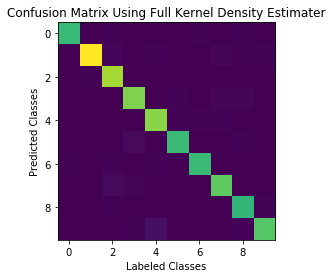

In [14]:
confusion = []
for k in range(10):
    vals = [test_labels[i,0] for i, p in enumerate(preds) if p == k]
    confusion += [np.bincount(vals, minlength=10)]
    
confusion = np.array(confusion)
# print confusion.shape
# print confusion

plt.title('Confusion Matrix Using Full Kernel Density Estimater')
plt.xlabel('Labeled Classes')
plt.ylabel('Predicted Classes')
plt.imshow( confusion )